# Unsupervised Learning and Preprocessing

This chapter will look at transformations of the dataset and clustering.

## Preprocessing and Scaling

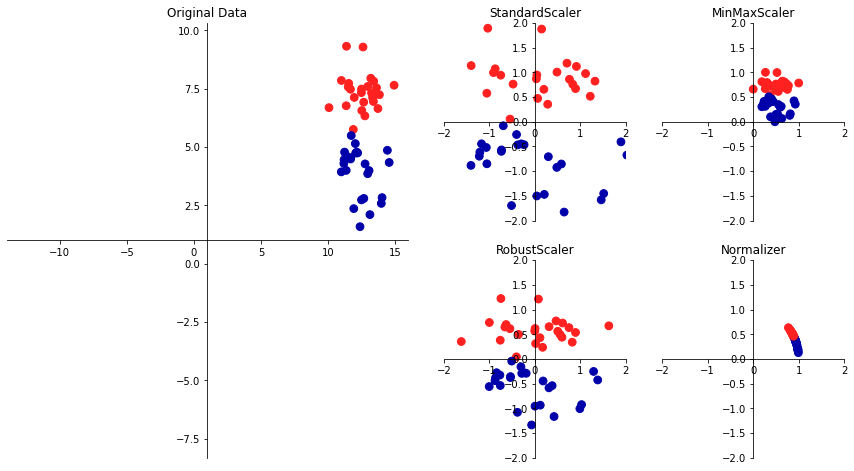

In [1]:
# Algorithms like NN and SVMs are sensitive to the scaling of data. 
# A common practice is to adjust features so the data representation for them is more suitable for these algorithms.

import mglearn

mglearn.plots.plot_scaling()

In [2]:
# StandardScaler ensures each feature has a mean of 0 and variance of 1
# RobustScaler controls the median and quartiles
# MinMaxScaler shifts the data such that all features are between 0 and 1
# Normalizer scales each data point so that each feature vector has a Euclidean length of 1

In [3]:
# Preprocessing example on cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
# We import a preprocessor and instantiate it
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Compute parameters needed to scale the training data and test data
scaler.fit(X_train)

MinMaxScaler()

In [5]:
# Transform the data using the scaler
X_train_scaled = scaler.transform(X_train)
# Show dataset before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# In order to apply SVM, we also need to transform the test set
X_test_scaled = scaler.transform(X_test)
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


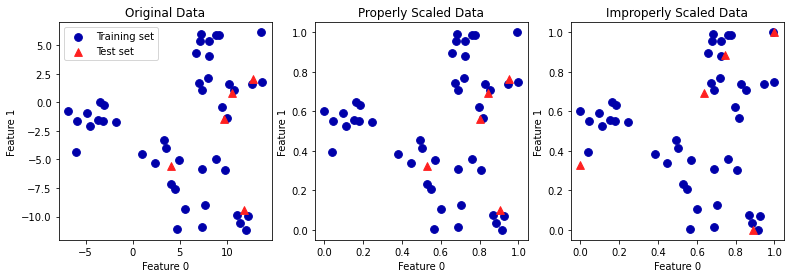

In [7]:
# Show what would happen if we transformed the test and training set differently
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Plot training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data");

# Scale the data properly
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Properly Scaled Data");

# Scale the test data IMPROPERLY
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Plot improperly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', color=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")


In [8]:
# Can also fit and transform a model together
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
# Same but more efficient:
X_scaled_d = scaler.fit_transform(X)

In [9]:
# Look at the effect of scaling on a multi-class support vector machine

# No scaling:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

# Scaling:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.94
Scaled test set accuracy: 0.97


In [10]:
# Preprocessing with a different method looks similar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## Dimensionality Reduction, Feature Extraction, and Manifold Learning

### Principal Component Analysis

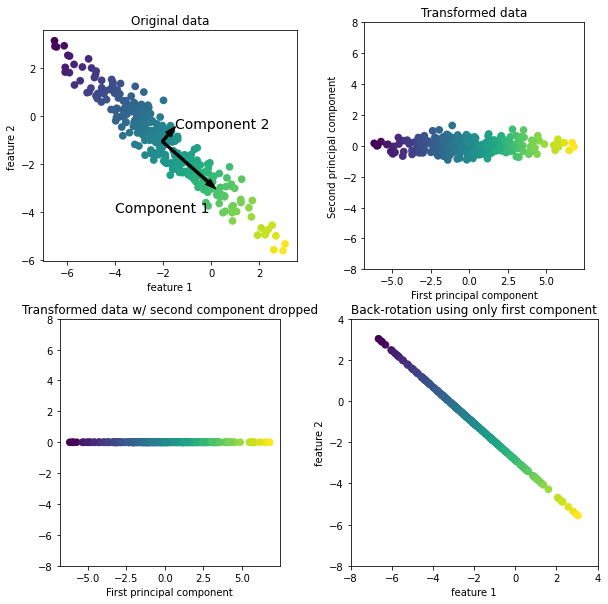

In [11]:
# Show PCA illustration
mglearn.plots.plot_pca_illustration()

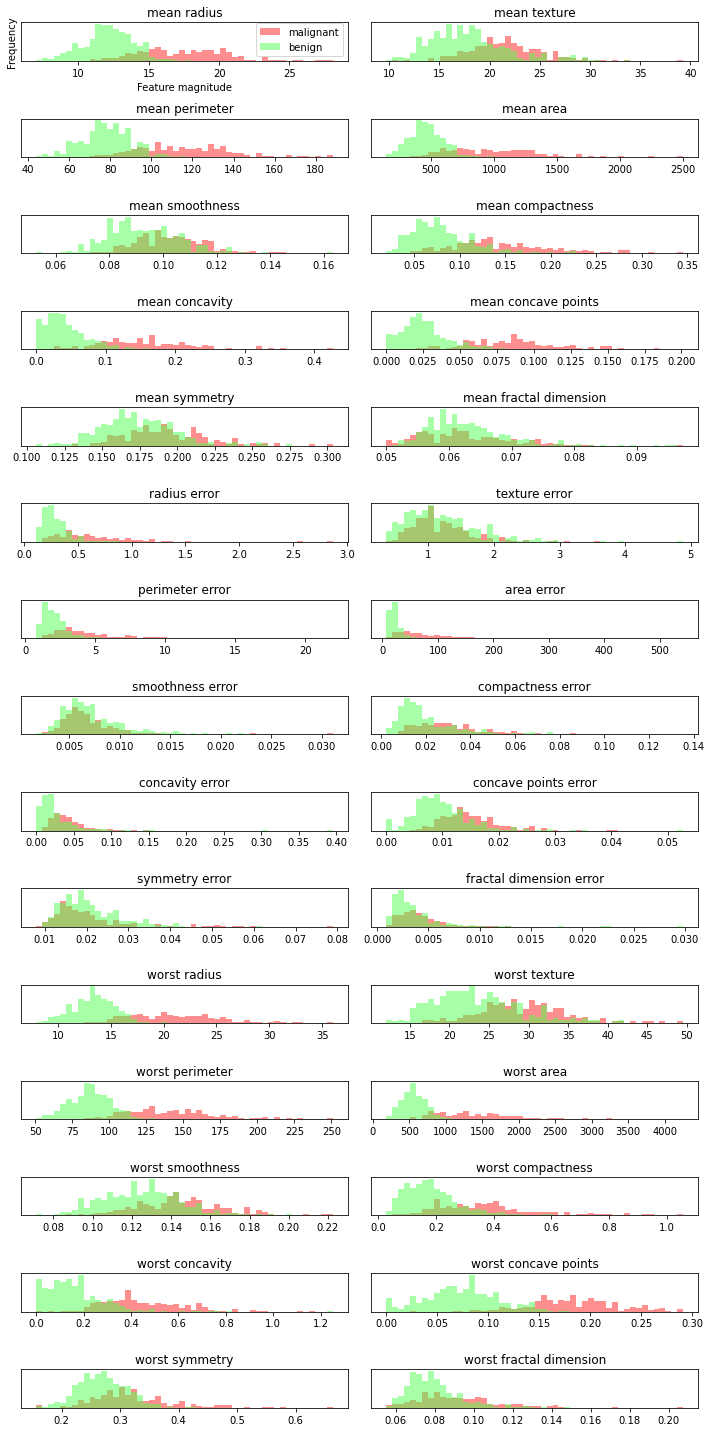

In [12]:
# Example applying PCA to the cancer dataset

import numpy as np

# For this dataset, producing pair plots is difficult due to the large number of features. We can compute and plot histograms though.

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


In [13]:
# Before applying PCA, we'll scale the data so each feature has unit variance
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [14]:
# Instantiate the PCA object, find the principal components, apply the dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


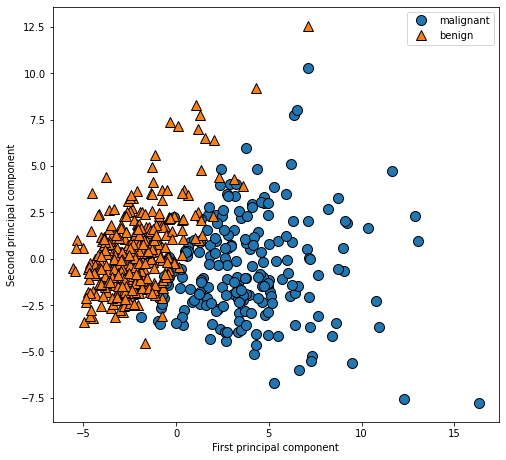

In [15]:
# Now plot the first two principal components
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

In [16]:
# The actual principal components are stored in the components_ attribute
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


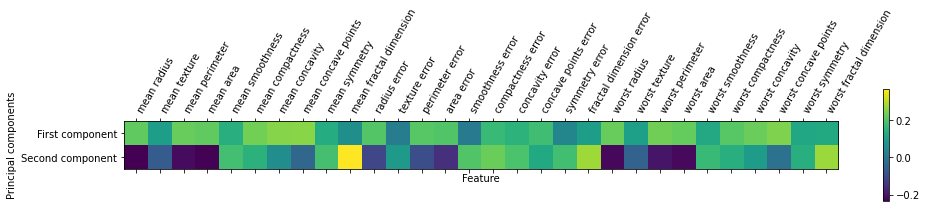

In [17]:
# We can also visualize the coefficients with a heat map
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

Eigenfaces for feature extraction

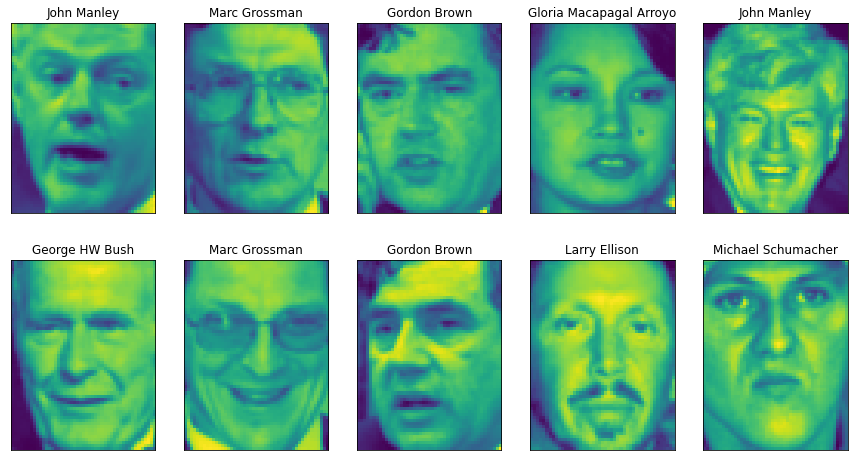

In [18]:
# Here we show an example of using PCA for feature extraction on a dataset containing labeled faces of famous people in the early 2000s

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=2, resize=0.5)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [19]:
# Count how often each person appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='')
    if (i + 1) % 3 == 0:
        print()

Alex Barros                 2Arminio Fraga               6Bob Huggins                 4
Colin Montgomerie           5Darren Clarke               2Edward James Olmos          2
George HW Bush             13Gloria Macapagal Arroyo    44Gordon Brown               13
Heath Ledger                4John Manley                 7Larry Ellison               3
Marc Grossman               4Michael Schumacher         18Mike Tyson                  4
Nelson Mandela              4Paul ONeill                 9Tiger Woods                23


In [20]:
# Extract people and labels and scale the values to be between 0 and 1
X_people = people.data
y_people = people.target

X_people = X_people / 255.

In [21]:
# Train a one-nearest-neighbor classifier to identify the most similar face image
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Show test score
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.57


Computing distances in "pixel-space" isn't very helpful. 
A face shifted over one pixel will have a radically different norm than another picture of the same face.
We'll use PCA to compute distances along principal components instead.

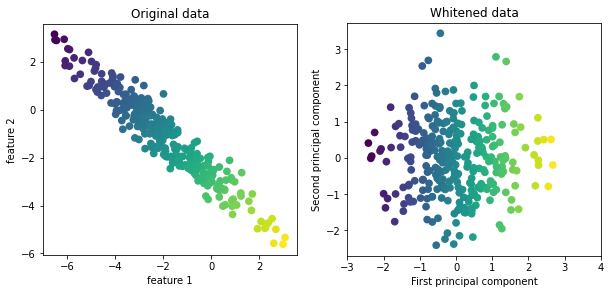

In [22]:
# "Whitening" rescales the PCs to have the same scale
mglearn.plots.plot_pca_whitening()

In [23]:
# Fit the PCA object to the training data and extract the first 100 principal components
pca = PCA(n_components = 100, whiten=True, random_state=0).fit(X_train)

# Transform the training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (125, 100)


In [24]:
# Now use the one-nearest-neighbors classifier on the transformed data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.36


pca.components_.shape: (100, 2914)


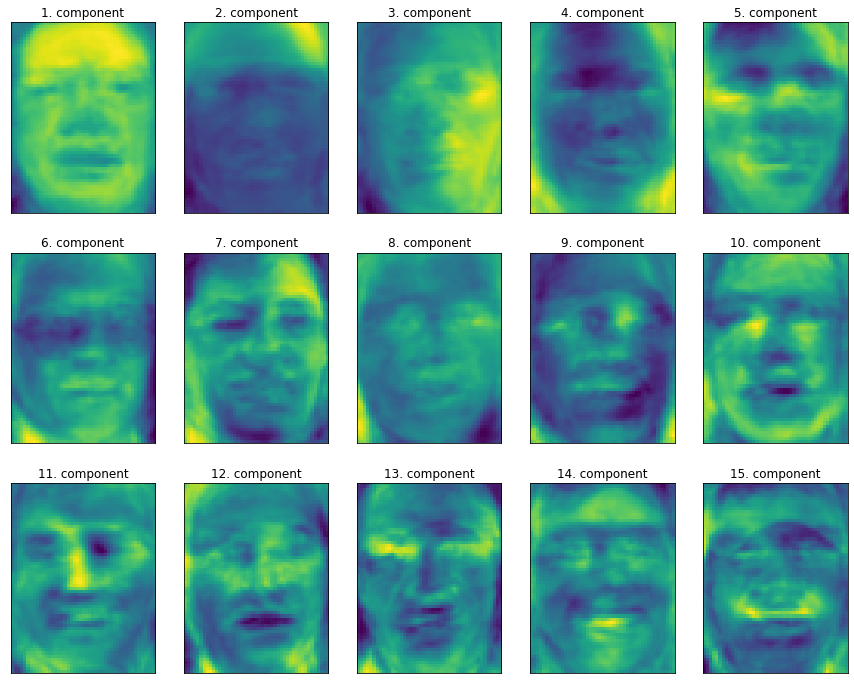

In [25]:
# We can visualize the principal components. These are directions in input space, which here means 
# the principal components are 50x37-pixel grayscale images.
print("pca.components_.shape: {}".format(pca.components_.shape))

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))


In [26]:
# Visualize the feature space by adding a subset of the features (basis vectors) to reconstruct faces.
# mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

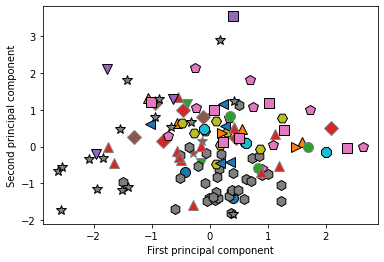

In [27]:
# Try visualizing all the faces in the dataset in a scatter plot with two PCs
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# This is not helpful, we need more than two PCs to identify faces.

Non-Negative Matrix Factorization (NMF)

This is another feature extraction technique, but all of the entries of the data array must be positive. 
We then seek a matrix decomposition in which all of the elements of the new matrices are also non-negative.

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarnin

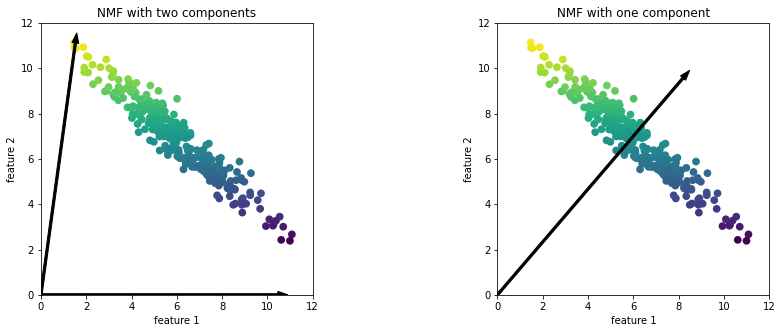

In [28]:
# Example applying NMF to synthetic data
mglearn.plots.plot_nmf_illustration()

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


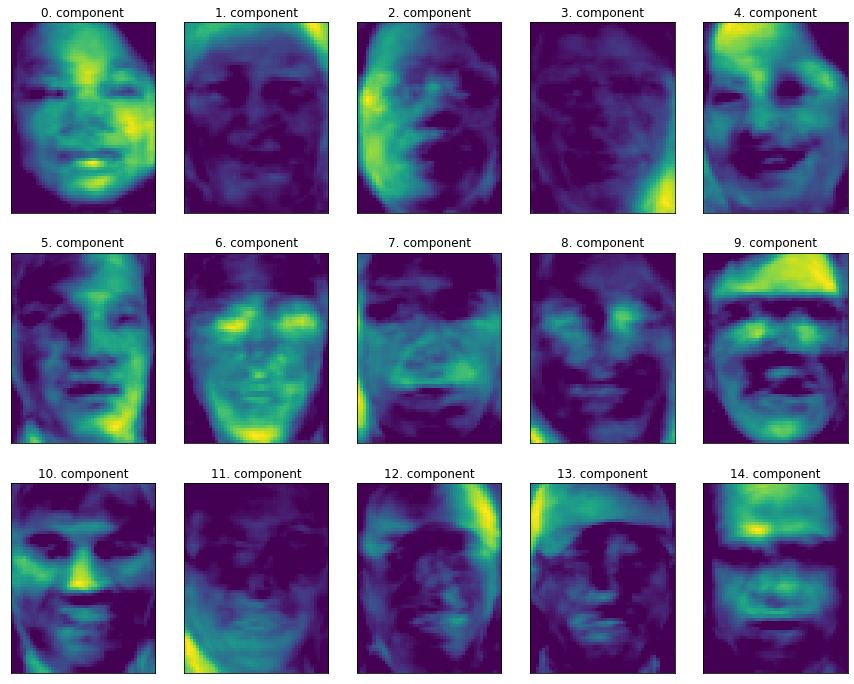

In [29]:
# Apply NMF to face images
# First see how number of components impacts the reconstruction
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

# Show first 15 components from NMF
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

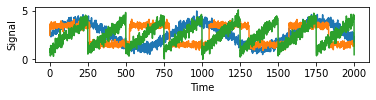

In [30]:
# Look at an audio signal example
S = mglearn.datasets.make_signals()

plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal");

In [31]:
# Mix the data
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [32]:
# Use NMF to attempt to recover the three original signals:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Recovered signal shape: (2000, 3)


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [33]:
# Use PCA to attempt to recover the three original signals:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

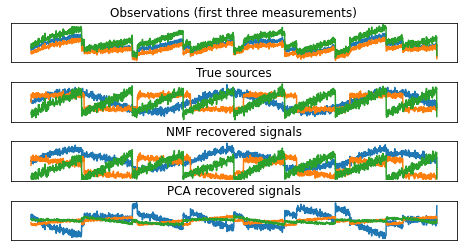

In [34]:
# Plot the results
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### Manifold Learning with t-SNE

Manifold learning techniques are useful for exploratory data analysis, but are rarely used if the final goal is supervised learning.

t-SNE finds a 2D representation of the data the preserves distances between points.

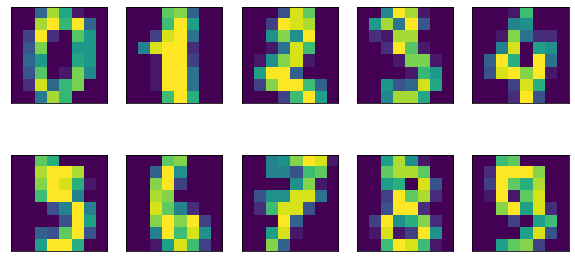

In [35]:
# Apply t-SNE on a dataset of handwritten digits in scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

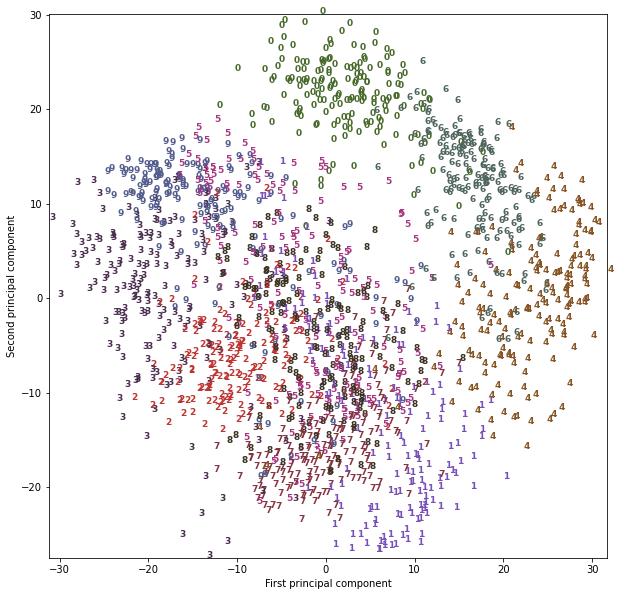

In [36]:
# Plot the first two principal components and color each dot by its class
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

# plot
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # plot the digits as text
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

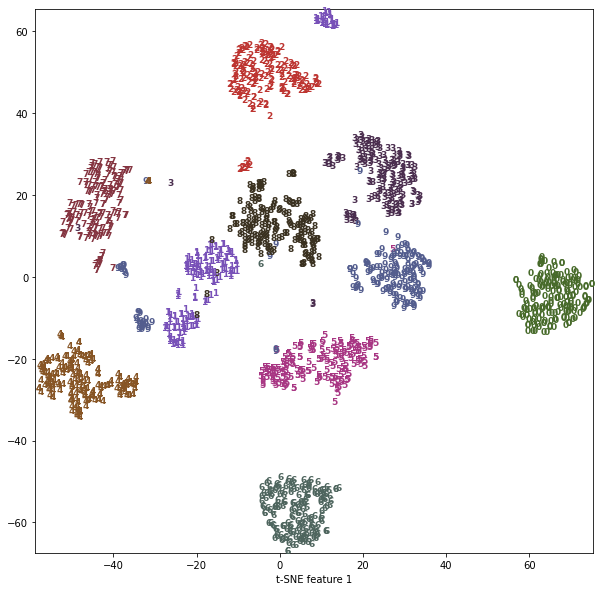

In [37]:
# Apply t-SNE to the same datset
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
# transform data
digits_tsne = tsne.fit_transform(digits.data)

# plot results
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # plot the digits as text again
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1");

## Clustering

### k-Means Clustering

The k-Means algorithm assigns a data point to the closest cluster center, then sets each cluster center as the mean of 
the data points assigned to it. This process continues until the assignment of instances to clusters no longer changes.

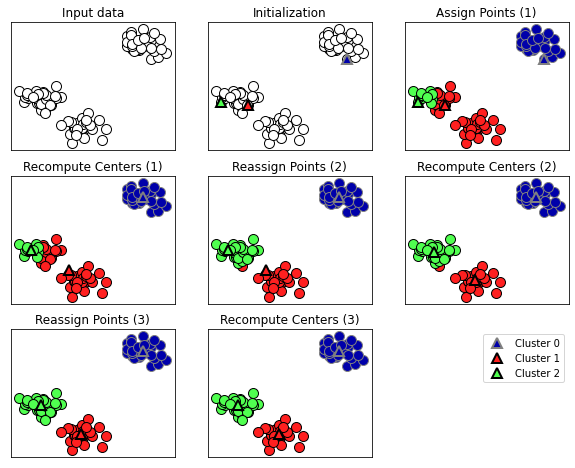

In [38]:
mglearn.plots.plot_kmeans_algorithm()

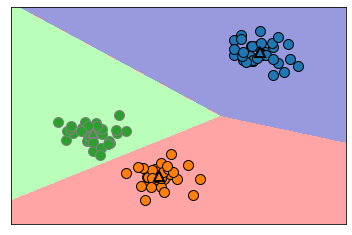

In [39]:
# Show the boundaries from the previous example
mglearn.plots.plot_kmeans_boundaries()

In [40]:
# Applying the k-means algorithm with scikit-learn involves instantiating the object and passing the number of clusters
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# synthetic 2D data
X, y = make_blobs(random_state=1)

# build model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# show cluster membership from trained model
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [41]:
# We can also assign cluster centers to new points with predict. Running this on the training set (should) yield the same results.
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


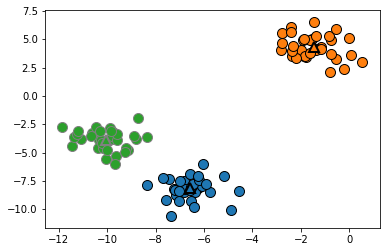

In [42]:
# Plot the data and clusters
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2], markers='^', markeredgewidth=2)

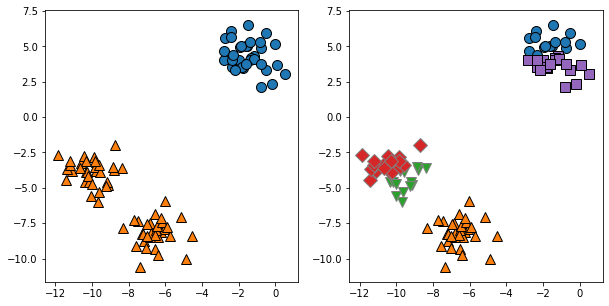

In [43]:
# Show what happens if we use more or fewer cluster centers
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0]);

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1]);

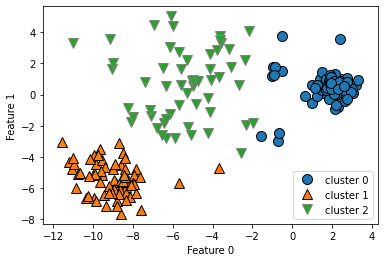

In [44]:
# Show an example where k-means struggles because it tries to give each cluster roughly the same diameter
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

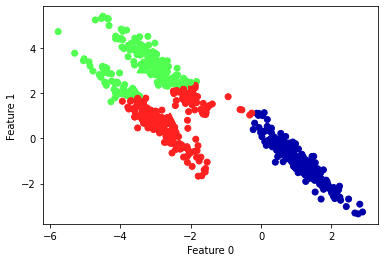

In [45]:
# Show another example where k-means struggles because it assumes all directions are equally important for each cluster

# generate cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# use three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

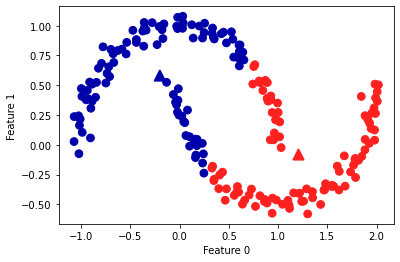

In [46]:
# k-means will also struggle on clusters with weird shapes, like the two moons dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# use two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

Vector quantization is the idea that each data point can be represented by its cluster center. This represents a type of
dimensionality reduction similar to PCA and NMF.

In [47]:
# Show a side-by-side of PCA, NMF, and k-means on the face dataset

# Train the models and label the data

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0, max_iter=75)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 75 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 75 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'nmf')

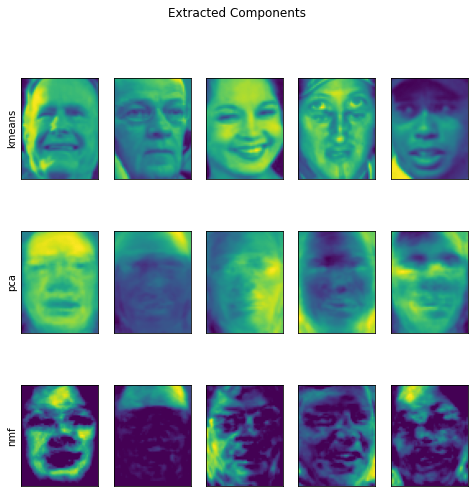

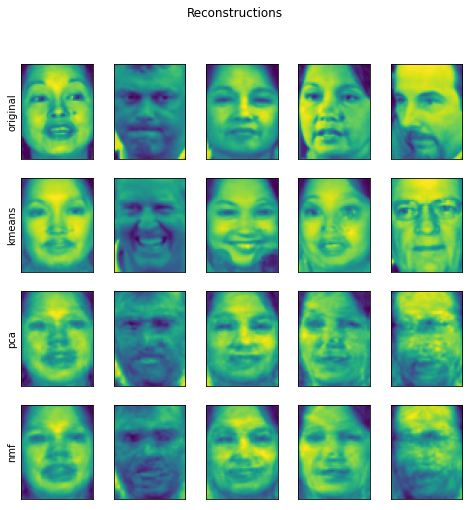

In [48]:
# Display the results
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


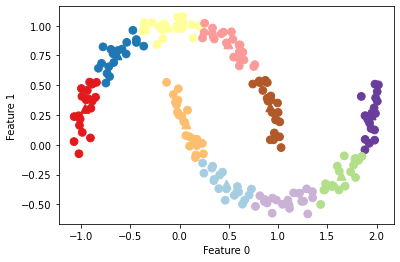

In [49]:
# One option with k-means clustering is to use more clusters than the dimension of the data, something
# unavailable in both PCA and NMF
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [50]:
# We can now get an expressive representation of the data using the distances to each of the cluster
# centers as features
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))


Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### Agglomerative Clustering

Agglomerative clustering are a collection of algorithms which start by declaring each point its own cluster, then merging the two most similar clusters until you hit 
a stopping criterion. In scikit-learn that stopping criterion is the number of clusters.

The measure of "most similar" has three options in scikit-learn:
- ward picks the two clusters such that the variance within all clusters increase the least, leading to clusters relatively equal in size.
- average linkage merges the two clusters with the smallest average distance between all their points.
- complete linkage (or maximum linkage) merges the two clusters with the smallest maximum distance between their points.

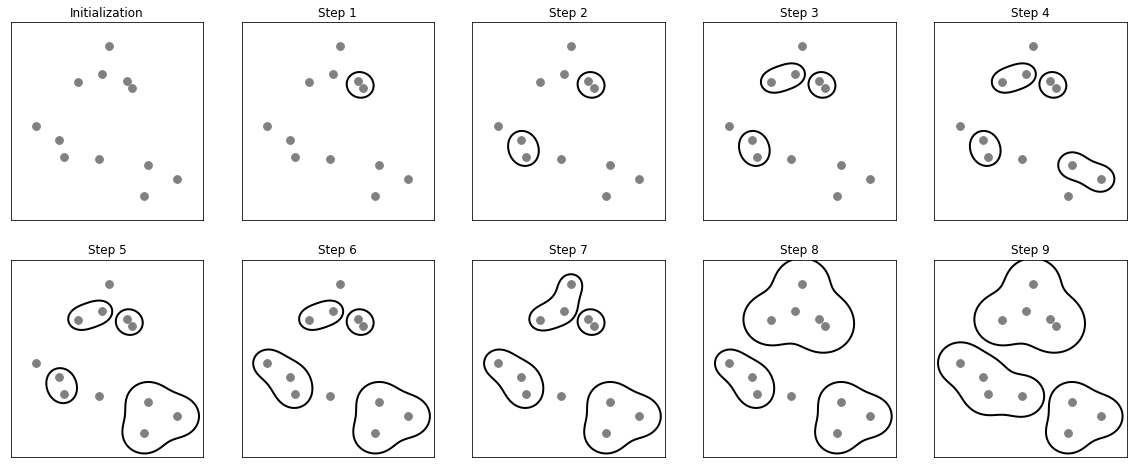

In [51]:
# An example of agglomerative clustering
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

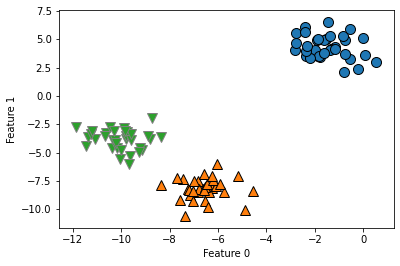

In [52]:
# Note: agglomerative clustering has no predict method, as it cannot make predictions for new data points. We use fit_predict
# to build the model and get the cluster membership on the training set.

# Example of using Agglomerative Clustering on blob data:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Agglomerative clustering produces hierarchical clustering, meaning each intermediate step provides a clustering of the data.

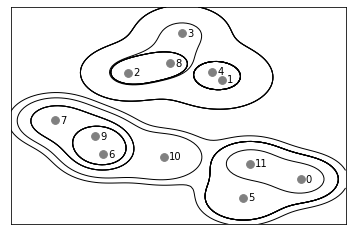

In [53]:
# This example shows all possible clusterings of a dataset:
mglearn.plots.plot_agglomerative()

A dendrogram can be used to visualize higher-dimensional clustering. SciPy has support for drawing dendrogarms.

Text(0, 0.5, 'Cluster distance')

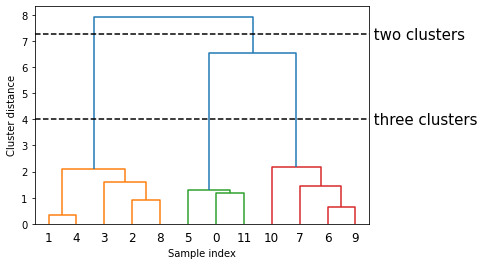

In [54]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# apply agglomerative ward clustering
linkage_array = ward(X)
# plot the dendrogram
dendrogram(linkage_array)

# mark cuts in tree for two/three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Aggolomerative clustering still fails at complex data shapes like "two moons", but the next algorithm does not.

### DBSCAN

DBSCAN stands for "density-based spatial clustering of applications with noise". It does not require the user to set the
number of clusters a priori, it can capture cluster with complex shapes, and it can capture points that are not a part of any cluster. 
However, it is somewhat slower than agglomerative clustering and k-means.

DSBSCAN works by indentifying points in dense regions of feature space, called core samples. Any point that's not a core sample is
labeled as noise in the first stage of the algorithm. All neighbors of an identified core point are then visited and the process is
repeated.

There are three types of points: core points, points within distance eps of core points (boundary points), and noise.

In [55]:
# We'll apply DBSCAN to the synthetic blob dataset (note: like agglomerative clustering, DBSCAN does not allow predictions on new test data):
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print("Cluster memberships:\n{}".format(clusters))


Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


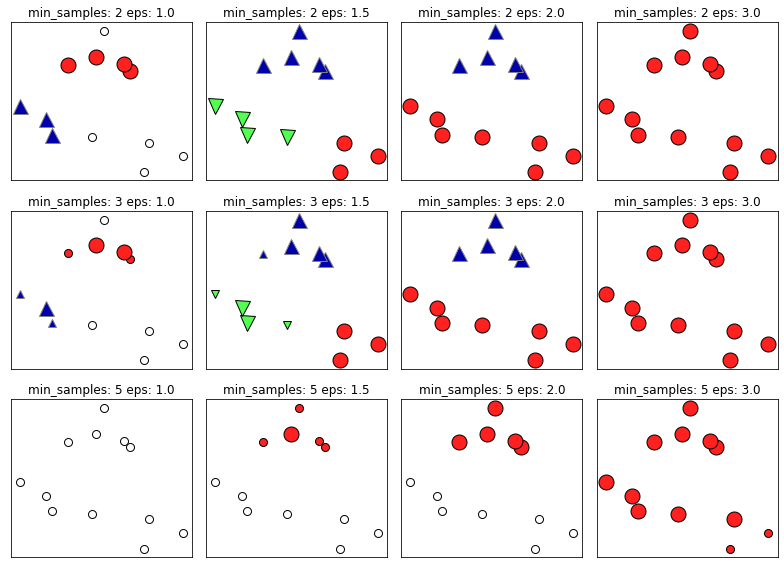

In [56]:
# All datapoints in the previous example were labeled as noise, because the parameters eps and min_samples were not tuned correctly.
# Changing those parameters will change the results, as seen below.
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

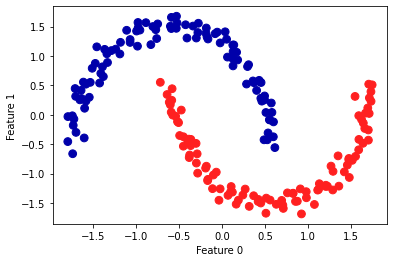

In [57]:
# Setting eps correctly is crucial to getting good results.

# Here's an example using DBSCAN on the two_moons dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### Comparing and Evaluating Clustering Algorithms

It's difficult to assess how well a clustering algorithm worked or to compare results between different 
clustering algorithms. If we know ground truth, we can use either the adjusted rand index (ARI) or normalized mutual information (NMI)
metrics to give a quantitative assessment between 0 and 1.

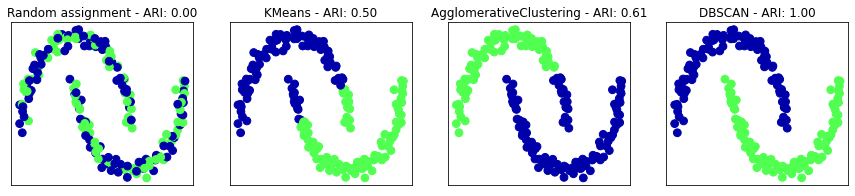

In [58]:
# Comparison using ARI between k-means, agglomerative clustering, and DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# initialize clusterers
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))


In [59]:
# Using "accuracy_score" is a mistake, as it requires the assigned cluster labels to exactl match the ground truth
from sklearn.metrics import accuracy_score

# these two correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


Evaluating Clustering without Ground Truth

ARI requires ground truth, which we'll never have in practice. Thus ARI and NMI are useful for developing algorithms
but not for assessing success in an application.

The silhouette coefficient scores clustering algorithms without needing the ground truth. The silhouette score computes
the compactness of a cluster, where higher is better, with a perfect score of 1.

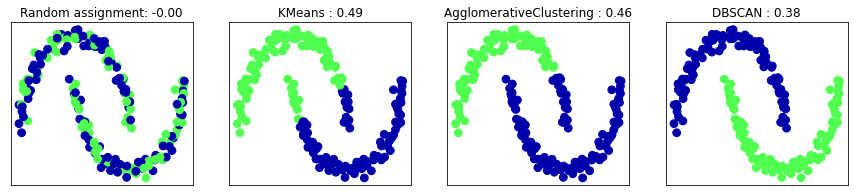

In [60]:
# Example comparing k-means, agglomerative clustering, and DBSCAN on the two-moons dataset using the silhouette score:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# make data zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

Perhaps a better method for evaluating clusters is using robustness-based clustering metrics. These run one
the clustering algorithms after adding noise or adjusting parameters and testing again. If the result is similar
over many perturbations, the result is likely trustworthy.

Unique labels: [-1]
Unique labels: [-1]
Unique labels: [-1  0]
Number of points per cluster: [ 12 155]


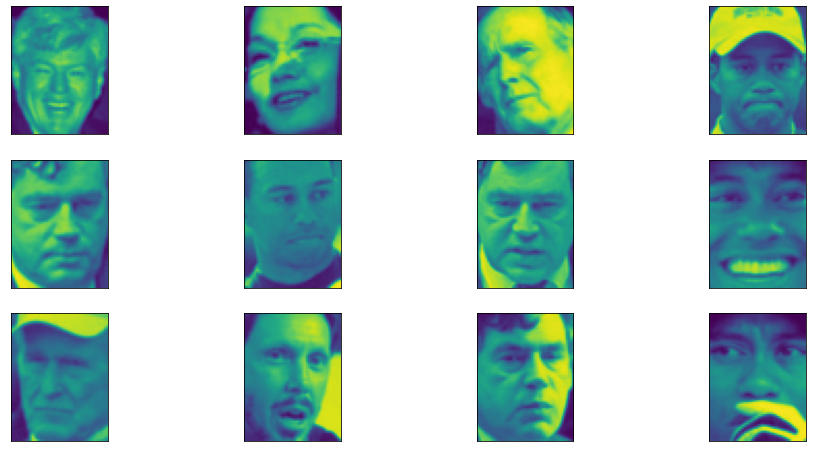

In [68]:
# Typically the only way to analyze how clustering performed is to manually look at the clusters. Return to the face
# dataset for an example.

# Apply k-means, DBSCAN and agglomerative clustering to the labeled faces in the wild dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)


Unique labels: [-1]
Unique labels: [-1]
Unique labels: [-1  0]
Number of points per cluster: [ 12 155]


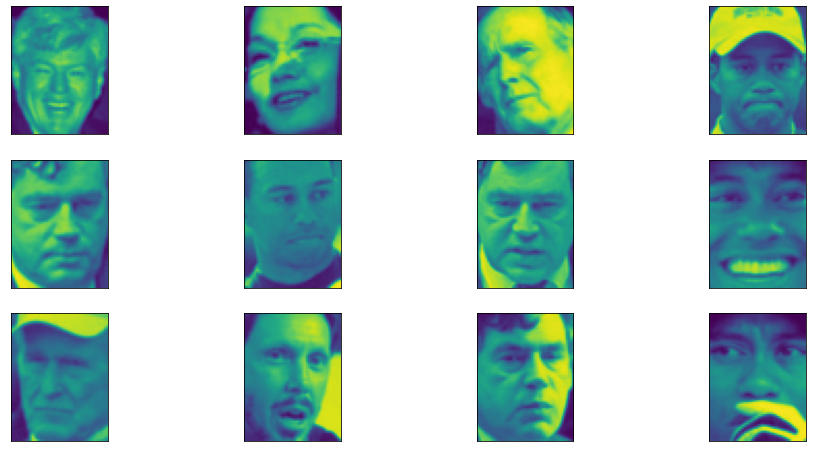

In [75]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

# make min_samples smaller in order to label points as belonging to a group as opposed to just noise
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

# once more but now increase eps
dbscan = DBSCAN(min_samples=3, eps=13)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

# Look at points labeled as noise
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(16, 8))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [76]:
# This analysis (finding the "odd one out") is called outlier detection.

# Test different values of eps to try to get different clustering
for eps in [1, 5, 7, 8, 9.5, 10, 12]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [167]

eps=5
Clusters present: [-1]
Cluster sizes: [167]

eps=7
Clusters present: [-1]
Cluster sizes: [167]

eps=8
Clusters present: [-1  0  1  2  3]
Cluster sizes: [159   2   2   2   2]

eps=9.5
Clusters present: [-1  0  1  2]
Cluster sizes: [134  29   2   2]

eps=10
Clusters present: [-1  0]
Cluster sizes: [125  42]

eps=12
Clusters present: [-1  0]
Cluster sizes: [ 46 121]


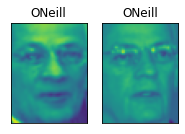

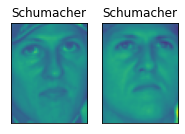

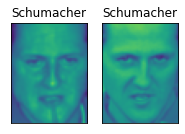

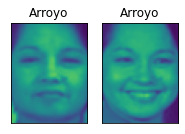

In [78]:
# Analyze eps=8 results
dbscan = DBSCAN(min_samples=2, eps=8)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [83]:
# Now we'll analyze the dataset with k-means. k-means is more likely to set even-sized clusters compared
# with DBSCAN, but we need to set the number of clusters well. We'll try several different sizes.
# extract clusters with k-means
for n_clusters in range(2,10):
    km = KMeans(n_clusters=n_clusters, random_state=0)
    labels_km = km.fit_predict(X_pca)
    print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))


Cluster sizes k-means: [166   1]
Cluster sizes k-means: [160   6   1]
Cluster sizes k-means: [ 46  11 109   1]
Cluster sizes k-means: [  1 122   1  25  18]
Cluster sizes k-means: [  1 126   1   1  37   1]
Cluster sizes k-means: [  1  38  20   1   1   1 105]
Cluster sizes k-means: [  1 113  28   1   1  21   1   1]
Cluster sizes k-means: [ 19   1 116   1   1   1   1  26   1]


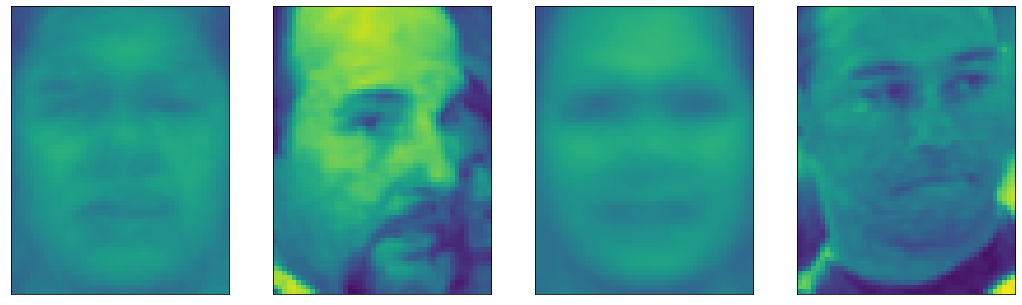

In [84]:
# Visualize cluster centers for n_clusters = 4
fig, axes = plt.subplots(1, 4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(18, 10))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)


In [85]:
# Now we'll look at the faces dataset with agglomerative clustering
for n_clusters in range(2,12):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agg = agglomerative.fit_predict(X_pca)
    print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [166   1]
Cluster sizes agglomerative clustering: [150   1  16]
Cluster sizes agglomerative clustering: [ 16   3 147   1]
Cluster sizes agglomerative clustering: [147   3  15   1   1]
Cluster sizes agglomerative clustering: [ 41   3  15   1   1 106]
Cluster sizes agglomerative clustering: [ 15   3   8   1   1 106  33]
Cluster sizes agglomerative clustering: [  8   3   5  10   1 106  33   1]
Cluster sizes agglomerative clustering: [  5   3  33  10   1 106   4   1   4]
Cluster sizes agglomerative clustering: [ 33   3 106  10   1   4   4   1   4   1]
Cluster sizes agglomerative clustering: [106   3  30  10   3   4   4   1   4   1   1]


In [87]:
# Compare the ARI score of clusterings computed using agglomerative clustering and k-means
km = KMeans(n_clusters=5, random_state=0)
labels_km = km.fit_predict(X_pca)
agglomerative = AgglomerativeClustering(n_clusters=5)
labels_agg = agglomerative.fit_predict(X_pca)
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: -0.01


Text(0, 0.5, 'Cluster distance')

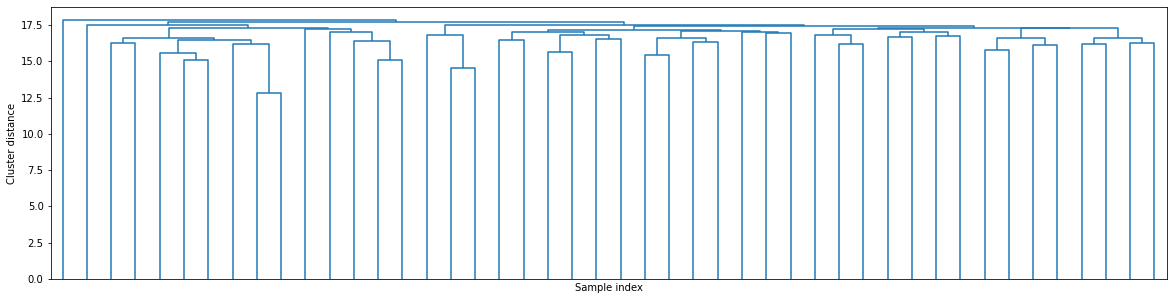

In [88]:
# Plot the dendrogram from agglomerative clustering
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

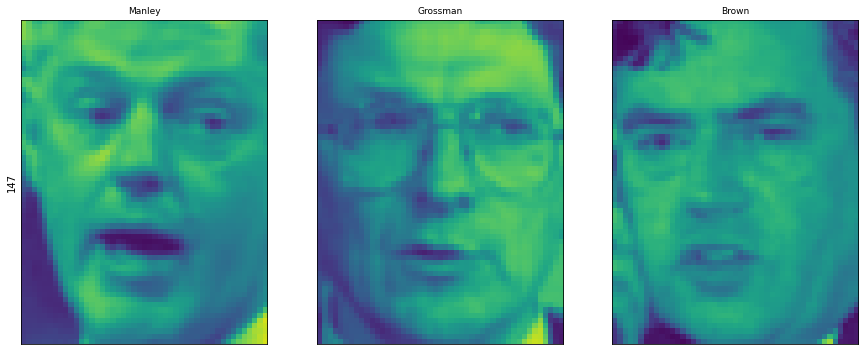

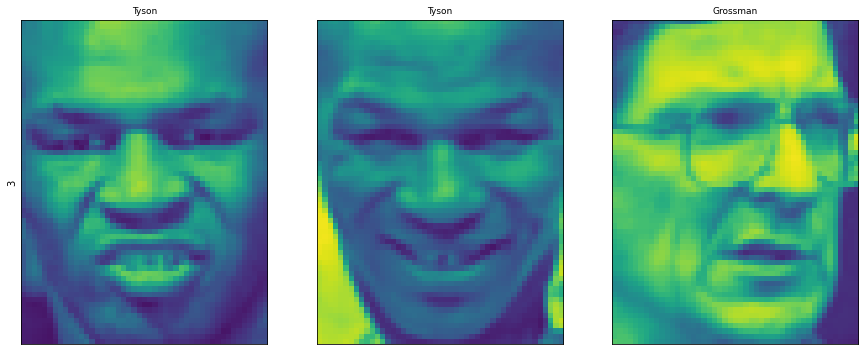

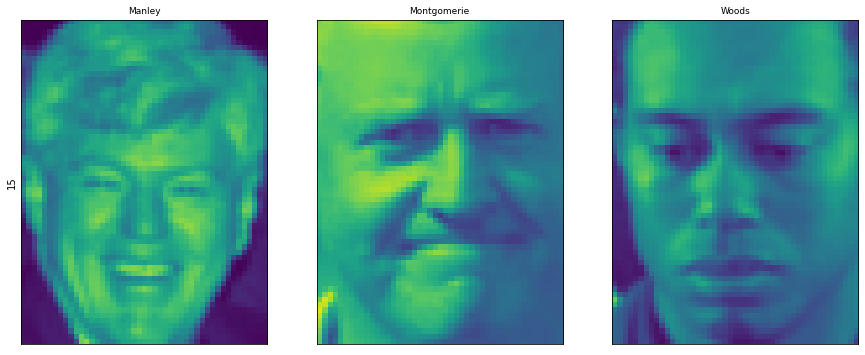

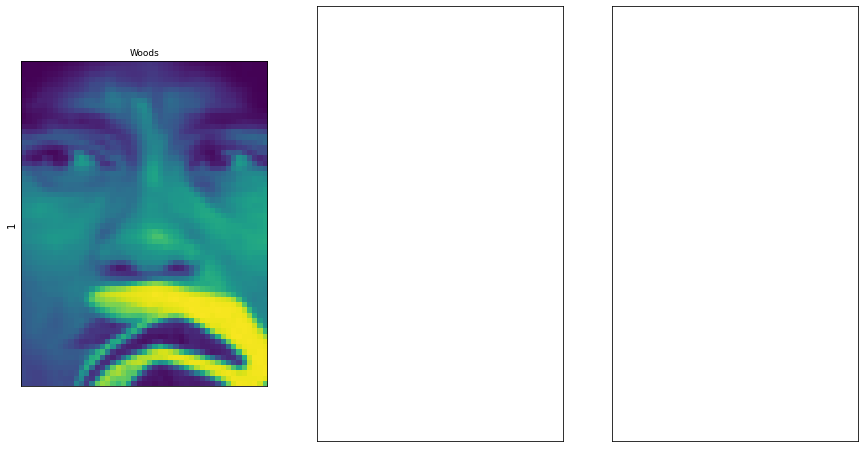

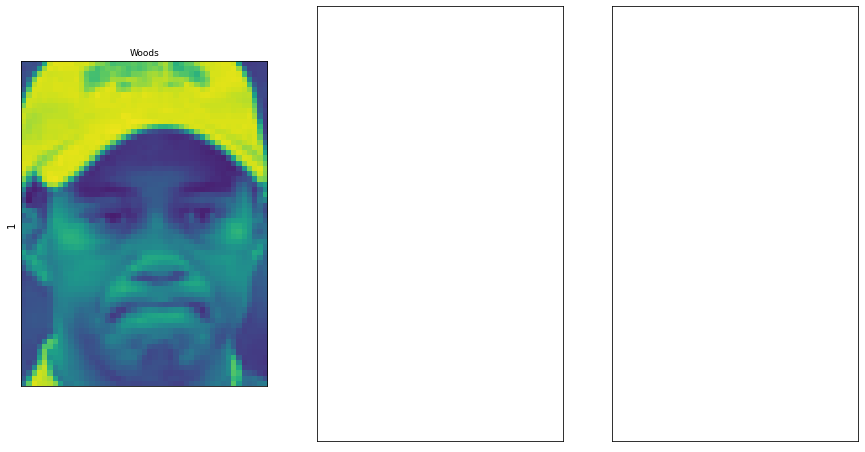

In [91]:
# Show the first several points in each cluster from agglomerative clustering
n_clusters = 5
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})